<a href="https://colab.research.google.com/github/Javier-Alfonso-DS/S03_T05_Exploracio_de_les_dades/blob/main/S03_T05_Exploracio_de_les_dades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descripció
---
Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas.
Nivell 1
---
Exercici 1
---
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

Exercici 2
---
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès
Troba quantes dades faltants hi ha per columna
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
Taula de les aerolínies amb més endarreriments acumulats
Quins són els vols més llargs? I els més endarrerits?
Etc.
Exercici 3
---
Exporta el data set net i amb les noves columnes a Excel.

The results
---
We had a total of nine entries, and turn out at the poster session at the JSM was great, with plenty of people stopping by to find out why their flights were delayed.
The data
---
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. To make sure that you're not overwhelmed by the size of the data, we've provide two brief introductions to some useful tools: linux command line tools and sqlite, a simple sql database.
The challenge
---
The aim of the data expo is to provide a graphical summary of important features of the data set. This is intentionally vague in order to allow different entries to focus on different aspects of the data, but here are a few ideas to get you started:

* When is the best time of day/day of week/time of year to fly to minimise delays?
* Do older planes suffer more delays?
* How does the number of people flying between different locations change over time?
* How well does weather predict plane delays?
* Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

You are also welcome to work with interesting subsets: you might want to compare flight patterns before and after 9/11, or between the pair of cities that you fly between most often, or all flights to and from a major airport like Chicago (ORD). Smaller subsets may also help you to match up the data to other interesting datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
# remember to escape white spaces
%cd /content/drive/My\ Drive/Data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [3]:
# Actualización de librería pandas en entorno Colab.
import pandas as pd
print(pd.__version__)
!pip install --upgrade pandas
print(pd.__version__)

1.3.4
1.3.4


In [4]:
# Importación de librerías, mejora de presentación gráfica via parámetros y lectura de los datos brutos 
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

df = pd.read_csv('./DelayedFlights.csv')

Exercici 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

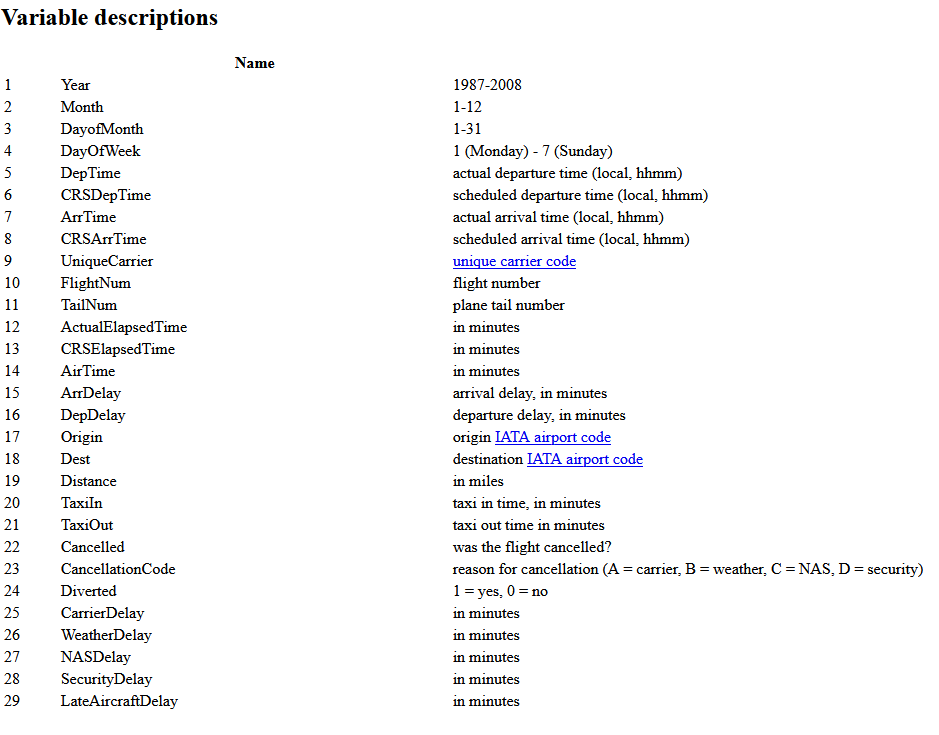

cause of the delay - cancellationCode

* Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
* National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
* Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
* Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.


In [5]:
print(df.info(verbose='true',show_counts='true')) 
#df.describe
print(df.head())
print(df.tail())
print ("# Observem que hi han 1.9 Millions de registres i que a les columnes 25 a 29 (index) hi han bastants NaN (0,7M)")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1936758 non-null  int64  
 1   Year               1936758 non-null  int64  
 2   Month              1936758 non-null  int64  
 3   DayofMonth         1936758 non-null  int64  
 4   DayOfWeek          1936758 non-null  int64  
 5   DepTime            1936758 non-null  float64
 6   CRSDepTime         1936758 non-null  int64  
 7   ArrTime            1929648 non-null  float64
 8   CRSArrTime         1936758 non-null  int64  
 9   UniqueCarrier      1936758 non-null  object 
 10  FlightNum          1936758 non-null  int64  
 11  TailNum            1936753 non-null  object 
 12  ActualElapsedTime  1928371 non-null  float64
 13  CRSElapsedTime     1936560 non-null  float64
 14  AirTime            1928371 non-null  float64
 15  ArrDelay           1928371 non-n

In [6]:
# Treiem columnes que no semblen rellevants amb drop (crea una nou df si no es posa inplace=True)
# Treiem la primera columna que es l'index repetit.
print(df.columns)
workdf = df.drop(columns = 'Unnamed: 0',axis=1)
print ("# Treiem la primera columna que es l'index repetit.")
workdf.head()

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
# Treiem la primera columna que es l'index repetit.


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Exercici 2
---
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès Troba quantes dades faltants hi ha per columna Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...) Taula de les aerolínies amb més endarreriments acumulats Quins són els vols més llargs? I els més endarrerits? Etc.

In [7]:
print(workdf.info(verbose='true',show_counts='true')) 
workdf.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

<bound method NDFrame.describe of          Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
0        2008      1           3  ...       NaN            NaN                NaN
1        2008      1           3  ...       NaN            NaN                NaN
2        2008      1           3  ...       NaN            NaN                NaN
3        2008      1           3  ...       0.0            0.0               32.0
4        2008      1           3  ...       NaN            NaN                NaN
...       ...    ...         ...  ...       ...            ...                ...
1936753  2008     12          13  ...       0.0            0.0               22.0
1936754  2008     12          13  ...      18.0            0.0                0.0
1936755  2008     12          13  ...      19.0            0.0               79.0
1936756  2008     12          13  ...       NaN            NaN                NaN
1936757  2008     12          13  ...       NaN            NaN  

Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...) 

In [8]:
workdf['MeanSpeed'] = workdf['Distance']/workdf['AirTime']*60 # Velocitat mitjana en mph sense delays
# Velocitat mitjana en mph amb delay arribada 
# (No posem el delay sortida perque només conta el d'arribada, es pot accelerar)
workdf['MeanSpeed_w_Delay'] = workdf['Distance']/(workdf['AirTime']+workdf['ArrDelay'])*60 
workdf['Delayed'] = workdf['ArrDelay']> 0
print("El número de vols que han arribat tard es",workdf['Delayed'].sum(),"de",len(workdf))
print("A continuació es mostra el df amb les columnes noves MeanSpeed, MeanSpeed_w_Delay, Delayed")
workdf     


El número de vols que han arribat tard es 1723415 de 1936758
A continuació es mostra el df amb les columnes noves MeanSpeed, MeanSpeed_w_Delay, Delayed


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,MeanSpeed_w_Delay,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,418.965517,476.470588,False
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,430.088496,422.608696,True
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,406.578947,343.333333,True
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,401.298701,278.378378,True
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,474.482759,421.224490,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,453.000000,374.896552,True
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,370.000000,188.627451,True
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,338.852459,187.058824,True
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,359.325843,326.326531,True


Taula de les aerolínies amb més endarreriments acumulats Quins són els vols més llargs? I els més endarrerits? Etc.

In [9]:
#Primer de tot, veiem quins son les aerolinies que estàn a les dades
Carriers = workdf['UniqueCarrier'].unique()
print("Hi han",len(Carriers),"companyies aèrees. Son les següents:\n",Carriers)

Hi han 20 companyies aèrees. Son les següents:
 ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']


In [10]:
dfAirlines = workdf[['UniqueCarrier','ArrDelay','Distance']].groupby('UniqueCarrier').sum()
print("A continuació mostrem les companyies ordenades de menys a més endarreriments")
dfAirlines.sort_values(by='ArrDelay')
print("WN: Southwest Airlines es la compañia amb més enderreriments però també amb més \
\n distància recorreguda.")
dfAirlines.sort_values(by='ArrDelay')

A continuació mostrem les companyies ordenades de menys a més endarreriments
WN: Southwest Airlines es la compañia amb més enderreriments però també amb més 
 distància recorreguda.


,ArrDelay,Distance
UniqueCarrier,,
AQ,15814.0,667403
HA,255613.0,6744672
F9,788549.0,25358373
AS,1406735.0,37120232
9E,2420468.0,24097833
OH,2675993.0,27027803
B6,3025749.0,61285558
FL,3100150.0,52186426
NW,3462075.0,65200422


In [11]:
dfAirlines['ArrDelay/Distance'] = dfAirlines['ArrDelay']/dfAirlines['Distance']
print("Fent el qüocient del retràs per la distància, veiem que el que menys \n \
es retrasa es AQ i el que més es YV.\n WN està per la meitat de la llista en quant a \
retrassos per distància.")
dfAirlines.sort_values(by='ArrDelay/Distance')

Fent el qüocient del retràs per la distància, veiem que el que menys 
 es retrasa es AQ i el que més es YV.
 WN està per la meitat de la llista en quant a retrassos per distància.


,ArrDelay,Distance,ArrDelay/Distance
UniqueCarrier,,,
AQ,15814.0,667403,0.023695
F9,788549.0,25358373,0.031096
CO,4045932.0,124241354,0.032565
US,3571867.0,95246238,0.037501
AS,1406735.0,37120232,0.037897
HA,255613.0,6744672,0.037899
DL,4535644.0,110643100,0.040993
AA,8889066.0,207596776,0.042819
UA,6733013.0,152721553,0.044087


In [12]:
workdf.sort_values(by='Distance',ascending=False)
MaxDistance = max(workdf['Distance']) 
print("La màxima distància es:",MaxDistance,"miles")
df_MaxDistance = workdf.loc[workdf['Distance'] == MaxDistance] # %timeit
#Explorem df_MaxDistance i veiem que els vols de EWR a HNL i volta son els més llargs.
print("El vol més llarg es el de:",df_MaxDistance['Origin'].head(1).values,"a",df_MaxDistance['Dest'].head(1).values)
MaxDelay = max(workdf['ArrDelay'])
print("L'enderreriment màxim es:",MaxDelay,"minuts","(",'{0:.2f}'.format(MaxDelay/60),"hores)")
df_MaxDelay = workdf.loc[workdf['ArrDelay'] == MaxDelay]
print("El delay es per CarrierDelay:",df_MaxDelay['CarrierDelay'].values,"minutes i LateAircraftDelay",df_MaxDelay['LateAircraftDelay'].values)
print("A continuació mostrem els vols ordenades de més a menys endarreriment.")
workdf.sort_values(by='ArrDelay',ascending=False).head(10)


La màxima distància es: 4962 miles
El vol més llarg es el de: ['EWR'] a ['HNL']
L'enderreriment màxim es: 2461.0 minuts ( 41.02 hores)
El delay es per CarrierDelay: [1455.] minutes i LateAircraftDelay [1002.]
A continuació mostrem els vols ordenades de més a menys endarreriment.


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,MeanSpeed_w_Delay,Delayed
322516,2008,2,3,7,1117.0,1820,2256.0,555,NW,808,N817NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,6.0,16.0,0,N,0,1455.0,0.0,4.0,0.0,1002.0,545.354691,82.236025,True
686014,2008,4,10,4,724.0,1417,858.0,1605,NW,1699,N3324L,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,8.0,14.0,0,N,0,2436.0,0.0,0.0,0.0,17.0,422.727273,21.586074,True
839306,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,0,N,0,1951.0,0.0,0.0,0.0,0.0,448.965517,31.059160,True
1009553,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0,364.800000,10.381332,True
1881639,2008,12,19,5,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,0,N,0,1307.0,0.0,58.0,0.0,290.0,351.250000,36.513265,True
1497823,2008,9,1,1,906.0,714,1048.0,825,NW,512,N322US,102.0,71.0,75.0,1583.0,1552.0,OMA,MSP,282,4.0,23.0,0,N,0,1552.0,0.0,31.0,0.0,0.0,225.600000,10.205066,True
685437,2008,4,27,7,1818.0,1633,1942.0,1800,NW,1472,N8986E,84.0,87.0,63.0,1542.0,1545.0,MOT,MSP,449,7.0,14.0,0,N,0,1542.0,0.0,0.0,0.0,0.0,427.619048,16.785047,True
163379,2008,1,5,6,800.0,1045,1452.0,1327,AA,2398,N622AA,292.0,42.0,207.0,1525.0,1275.0,EGE,MIA,1811,14.0,71.0,0,N,0,1158.0,0.0,117.0,0.0,250.0,524.927536,62.736721,True
1214839,2008,7,16,3,820.0,702,1325.0,1215,NW,804,N596NW,185.0,193.0,160.0,1510.0,1518.0,SEA,MSP,1399,7.0,18.0,0,N,0,1510.0,0.0,0.0,0.0,0.0,524.625000,50.263473,True
521096,2008,3,21,5,705.0,615,811.0,721,NW,1743,N786NC,66.0,66.0,47.0,1490.0,1490.0,BNA,MEM,200,5.0,14.0,0,N,0,1490.0,0.0,0.0,0.0,0.0,255.319149,7.807417,True


Exercici 3
---
Exporta el data set net i amb les noves columnes a Excel.

In [13]:
# determining the name of the file
file_name1 = './DelayedFlights_processed_1.xlsx'
file_name2 = './DelayedFlights_processed_2.xlsx'
file_name3 = './DelayedFlights_processed_1.csv'  
# saving the excel
# workdf.to_excel(file_name1) # No funciona, màx rows 1M
# print("Hi ha una limitació a Excel, que el màxim de files es 1048576 rows.")
# print("Per lo que creem 2 arxius per exportar el DataFrame")
# workdf.iloc[:1000000].to_excel(file_name1)
# workdf.iloc[1000000:].to_excel(file_name2)
# print('DataFrame is written to Excel File successfully.')
print("Tampoc funciona perque agafa tota la memòria del Colab")
print("Una altra opció es exportar-ho directament a CSV")
workdf.to_csv(file_name3)

Tampoc funciona perque agafa tota la memòria del Colab
Una altra opció es exportar-ho directament a CSV


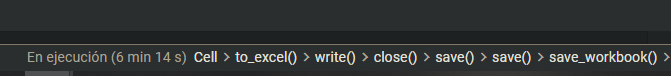

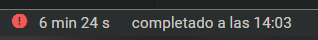

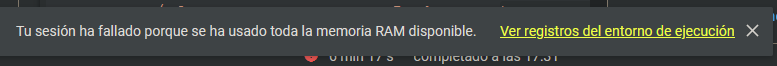

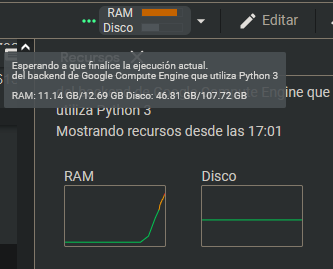